## Outliers

Theese are the most extreme values present in the data, also known as Anomalies.

We can detect them using: boxplots, histograms, scatter plots, IQR, Z-score.

We can delete, replace them. or we can use that ML models which donot care about outliers. like: KNN, Naive Bayes.

In [5]:
import numpy as np 
import pandas as pd 
import statistics
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# 3 Sigma technique(Standard deviation), in normal form outliers are beyond +3std and -3std.
data = pd.read_csv("raw_sales2.csv")

In [4]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [ ]:
#function to find outliers in dataset.
def find_anomalies(data):
    anomalies = [] # empty list to putin all the anomalies.

    random_data_std = statistics.stdev(data) #starndard deviation (σ)
    random_data_mean = statistics.mean(data) #mean (μ)

    anmaly_cutoff = random_data_std * 3 # 3σ

    lower_limit = random_data_mean - anmaly_cutoff # μ-3σ
    upper_limit = random_data_mean + anmaly_cutoff # μ-3σ

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit: # outliers are beyond μ-3σ and μ+3σ
            anomalies.append(outlier) # putting found outliers in list. 
    return anomalies
    

In [7]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [ ]:
li = find_anomalies(data['price']) 
print(len(li)) # we have 461 outliers means 1.55% of data
# means data is not in normal distribution.

461


In [9]:
len(data)

29580

In [ ]:
print(data.price.skew()) # skewness: tell whether the data is symmetric, left skewed or right skewed.
# here, our data is right/positive skewed. data is saturated towards the low values. Mean>median>mode

4.312009366902367


<Axes: xlabel='price', ylabel='Density'>

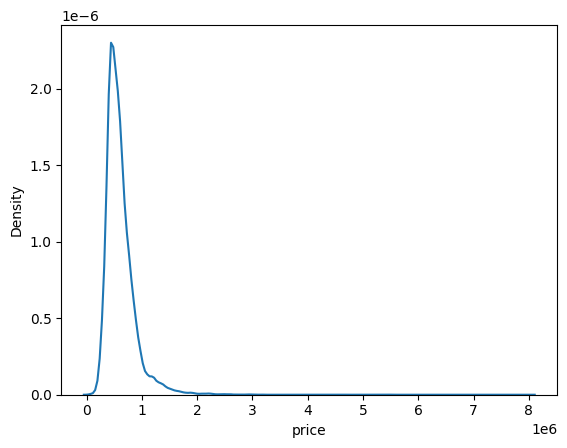

In [ ]:
sns.kdeplot(data.price)
# from the graph we can see: Leptokurtic kurtosis which means more outliers
# kurtosis :-> tells how peaked our data is, simply tells how much data is in tails(extreme points) vs around mean.

In [ ]:
# hence this data is not normally distributed, we'll use log transformation here.
data['price_transformed'] = np.log(data.price)
# log makes greater numbers into smaller one, in +ve skewed data we have extremely large outliers, thats why log transformation.
# in case of -ve skewed dataset, we use square transformation. which conversts extremely smaller nums into larger nums.


In [26]:
print(data.price_transformed.skew())

0.47316462699847633


<Axes: xlabel='price_transformed', ylabel='Density'>

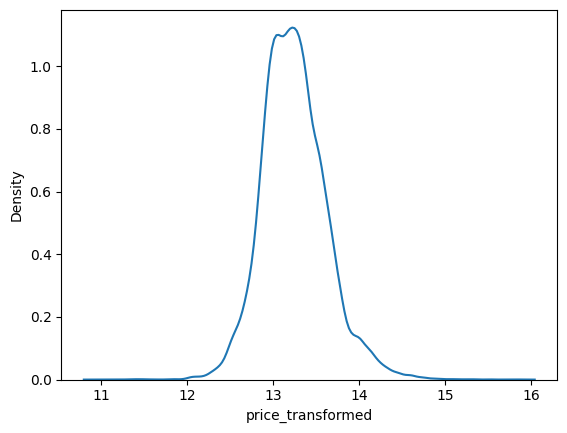

In [27]:
sns.kdeplot(data.price_transformed)

In [ ]:
# finding outliers in transformed price feature.
li2 = find_anomalies(data.price_transformed)
print(len(li2)) # here, outliers are reduced.

266


In [30]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [31]:
print(data.price_transformed_double.skew())

0.33092530655758595


<Axes: xlabel='price_transformed_double', ylabel='Density'>

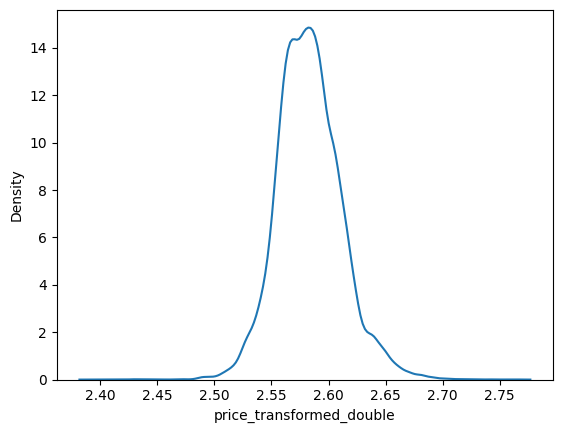

In [32]:
sns.kdeplot(data.price_transformed_double)

In [33]:
li3 = find_anomalies(data.price_transformed_double)
print(len(li3))

251


<Axes: >

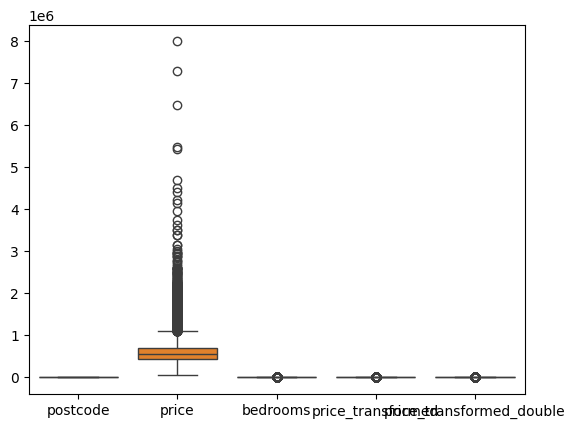

In [35]:
sns.boxplot(data=data)

In [36]:
data.head()

,datesold,postcode,price,propertyType,bedrooms,price_transformed,price_transformed_double
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154,2.578029
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636,2.531920
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769,2.541663
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927,2.553182
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328,2.537209
